In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag

## IcePmag VGP Latitude Calculation check

Within the IcePmag database I have sorted it for normal polarity based on vgp latitude greater than 0 and the directional polarity column to 1, which corresponds to a normal polarity.
We calculated the inclination residuals, and found some of them to be inconsistent with normal polarity residuals, as shown in the plot produced by the second cell.

This first cell imports the data and concatenates the two query results.

In [21]:
# importing the data and concatenating the dataframes into one df that spans 0-16.3Ma
icepmag_010 = pd.read_csv('..\data\icepmag_query_results0-10.csv', header=1)
icepmag_1016 = pd.read_csv('..\data\icepmag_query_results10-16.3.csv', header=1)
icepmag_016 = pd.concat([icepmag_010,icepmag_1016])
pd.set_option('display.max_columns', None)
icepmag_016

,UID,ref_id,region_id,location_id,site_name,lat,lon,height,elevation,n_samples,samples,sample_type_id,n_specimens,specimens,specimen_type_id,geologic_class_id,geologic_type_id,bed_dip,bed_dip_direction,alt_id,date_id,age,age_sigma,age_low,age_high,demag_type_id,demag_step_max,specimen_dir_calc_id,sample_dir_ave_method_id,site_dir_ave_method_id,dir_tilt_correction,dir_dec,dir_inc,dir_dec_alt,dir_inc_alt,dir_dec_unc,dir_inc_unc,dir_alpha95,dir_theta63,dir_r,dir_k,dir_n_samples,dir_n_specimens,dir_polarity,vgp_lat,vgp_long,vgp_lat_alt,vgp_long_alt,vgp_dp,vgp_dm,vgp_n_samples,vdm,vdm_sigma,vdm_n_samples,vadm,vadm_sigma,vadm_n_samples,magn_volume,magn_vol_sigma,magn_mass,magn_mass_sigma,magn_demag_level,susc_mean,q_koenig,pi_method_id,int_abs,int_abs_sigma,int_abs_sigma_perc,int_n_samples,int_n_specimens,Unnamed: 70
0,1,1,1,1,WB-1,64.35500,338.72770,-9999.0,130.0,6,-9999,2,6,-9999,1,1,1,4.5,130.0,-1,101,2.0,-9999.0,-9999.0,-9999.0,1,30.0,2,-1,2,4.5,204.0,-71.0,205.0,-70.0,-9999.0,-9999.0,4.0,-9999.0,-9999.0,-9999.0,6,-9999,3,-75.0,275.0,-74.0,277.0,-9999.0,-9999.0,6,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,0.94,-9999.0,-9999.0,-9999,10,-9999.0,-9999.0,-1,-9999.0,-9999.0,-9999,-9999,-9999,NaN
1,2,1,1,1,WB-2,64.35500,338.72770,-9999.0,140.0,5,-9999,2,5,-9999,1,1,1,4.5,130.0,-1,101,2.0,-9999.0,-9999.0,-9999.0,1,30.0,2,-1,2,4.5,210.0,-68.0,210.0,-67.0,-9999.0,-9999.0,2.0,-9999.0,-9999.0,-9999.0,5,-9999,3,-69.0,276.0,-68.0,277.0,-9999.0,-9999.0,5,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,1.00,-9999.0,-9999.0,-9999,10,-9999.0,-9999.0,-1,-9999.0,-9999.0,-9999,-9999,-9999,NaN
2,3,1,1,1,WB-3,64.35500,338.72770,-9999.0,150.0,5,-9999,2,5,-9999,1,1,1,4.5,130.0,-1,101,2.0,-9999.0,-9999.0,-9999.0,1,30.0,2,-1,2,4.5,265.0,-88.0,252.0,-87.0,-9999.0,-9999.0,6.0,-9999.0,-9999.0,-9999.0,5,-9999,3,-64.0,168.0,-66.0,172.0,-9999.0,-9999.0,5,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,3.50,-9999.0,-9999.0,-9999,10,-9999.0,-9999.0,-1,-9999.0,-9999.0,-9999,-9999,-9999,NaN
3,4,1,1,1,WB-4,64.35500,338.72770,-9999.0,158.0,5,-9999,2,5,-9999,1,1,1,4.5,130.0,-1,101,2.0,-9999.0,-9999.0,-9999.0,1,30.0,2,-1,2,4.5,121.0,-54.0,122.0,-54.0,-9999.0,-9999.0,5.0,-9999.0,-9999.0,-9999.0,5,-9999,3,-44.0,58.0,-45.0,57.0,-9999.0,-9999.0,5,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,1.64,-9999.0,-9999.0,-9999,10,-9999.0,-9999.0,-1,-9999.0,-9999.0,-9999,-9999,-9999,NaN
4,5,1,1,1,WB-5,64.35500,338.72770,-9999.0,178.0,5,-9999,2,5,-9999,1,1,1,4.5,130.0,-1,101,2.0,-9999.0,-9999.0,-9999.0,1,30.0,2,-1,2,4.5,240.0,-82.0,244.0,-80.0,-9999.0,-9999.0,3.0,-9999.0,-9999.0,-9999.0,5,-9999,3,-68.0,200.0,-66.0,205.0,-9999.0,-9999.0,5,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,12.24,-9999.0,-9999.0,-9999,10,-9999.0,-9999.0,-1,-9999.0,-9999.0,-9999,-9999,-9999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,9487,79,6,413,TR14-04,66.11754,340.93943,-9999.0,-9999.0,14,-9999,2,14,-9999,1,1,1,36.5,261.4,-1,101,-9999.0,-9999.0,11.0,12.0,3,-9999.0,4,-1,1,36.5,350.9,71.5,-9999.0,-9999.0,51.9,49.8,2.7,-9999.0,-9999.0,220.9,14,14,-1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.00,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-1,-9999.0,-9999.0,-9999,-9999,-9999,NaN
5217,9488,79,6,413,TR14-05A,66.11754,340.93943,-9999.0,-9999.0,9,-9999,2,9,-9999,1,1,1,36.5,261.4,-1,101,-9999.0,-9999.0,11.0,12.0,3,-9999.0,4,-1,1,36.5,116.0,-53.2,-9999.0,-9999.0,184.7,-69.5,6.9,-9999.0,-9999.0,65.2,8,8,-1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.00,-9999.0,-9999.0,-9999,-9999,-9999.0,-9999.0,-1,-9999.0,-9999.0,-9999,-9999,-9999,NaN
5218,9489,79,6,413,TR14-05B,66.11754,340.93943,-9999.0,-9999.0,10,-9999,2,10,-9999,1,1,1,36.5,261.4,-1,101,-9999.0,-9999.0,11

Records used: 4191


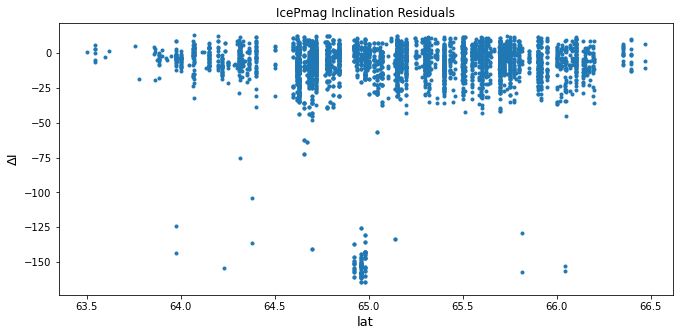

In [22]:
# Sorting for normal polarity
# declination and inclination are included in the sort to find only the valid directions
icepmag_016N = icepmag_016.loc[(icepmag_016["dir_polarity"] == 1) & (icepmag_016["dir_dec"] > 0) & (icepmag_016["vgp_lat"] > 0) & (icepmag_016["lat"] > -90)]

# calculate iga and the inc residual
icepmag_016N["Igad"] = np.degrees(np.arctan(2*np.tan(np.radians(icepmag_016N['lat']))))   # inputs latitude as radians into the tan function and outputs a value in degrees
icepmag_016N["ΔI"] =  (icepmag_016N["dir_inc"] - icepmag_016N["Igad"])           # inclination anamoly in degrees

# plot inclination residuals
plt.figure(figsize=(11, 5))

plt.plot(icepmag_016N['lat'],icepmag_016N["ΔI"], '.')
plt.title('IcePmag Inclination Residuals')
plt.ylabel('ΔI', fontsize=13)
plt.xlabel('lat', fontsize=13);
print('Records used:',len(icepmag_016N))

Now to calculate the vgp_lat to check these very large negative residuals. Below I present the original vgp latitudes from this dataset:

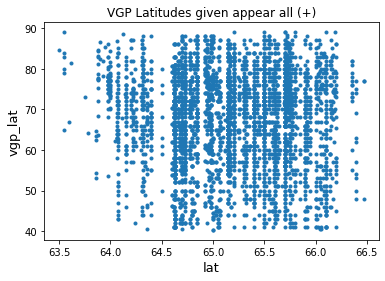

In [23]:
plt.plot(icepmag_016N['lat'],icepmag_016N['vgp_lat'], '.')
plt.title('VGP Latitudes given appear all (+)')
plt.ylabel('vgp_lat', fontsize=13)
plt.xlabel('lat', fontsize=13);

Calculating the VGP latitudes with pmag.py's dia_vgp:

In [44]:
icepmag_016N_latdir = pd.DataFrame()                     # empty df
# filling df with these columns extracted from IcePmag sorted for N polarity as described above
icepmag_016N_latdir['lat'] = icepmag_016N.lat            
icepmag_016N_latdir['lon'] = icepmag_016N.lon
icepmag_016N_latdir['dec'] = icepmag_016N.dir_dec
icepmag_016N_latdir['inc'] = icepmag_016N.dir_inc
icepmag_016N_latdir['a95'] = icepmag_016N.dir_alpha95
icepmag_016N_latdir['lat_vgp'] = icepmag_016N.vgp_lat
icepmag_016N_latdir['lon_vgp'] = icepmag_016N.vgp_lat

icepmag_016N_latdir.reset_index(inplace=True, drop=True) # reset index 
# creating arrays to be used in the input of dia_vgp
decs= list(icepmag_016N_latdir['dec'])      # turning tem
incs= list(icepmag_016N_latdir['inc'])
a95s= list(icepmag_016N_latdir['a95']) 
lats= list(icepmag_016N_latdir['lat']) 
lons= list(icepmag_016N_latdir['lon']) 
newdata=np.column_stack([decs,incs,a95s,lats,lons]) 

pmgapy_vgp = pmag.dia_vgp(newdata)           # vgp calculation
vgps = np.array(pmgapy_vgp).transpose()      # formatting 
vgp_df = pd.DataFrame(vgps)                  # putting the results into a df
vgp_df = vgp_df.rename(columns={0:"lon_vgp0",1:"LAT_VGP0",2:"dp",3:"dm"})   #renaming

df = pd.concat([icepmag_016N_latdir,vgp_df.reindex(icepmag_016N_latdir.index)], axis=1)  # add vgp calc results to main icepmag n df
df['lat_vgp_diff0'] = (df['lat_vgp'] - df['LAT_VGP0'])
# calculating Igad and inc residual of new vgp lats
df["Igad"] = np.degrees(np.arctan(2*np.tan(np.radians(df['lat']))))   # inputs latitude as radians into the tan function and outputs a value in degrees
df["ΔI"] =  (df["inc"] - df["Igad"])           # inclination anamoly in degrees

df

,lat,lon,dec,inc,a95,lat_vgp,lon_vgp,lon_vgp0,LAT_VGP0,dp,dm,lat_vgp_diff0,Igad,ΔI
0,64.35500,338.72770,335.0,77.0,3.0,79.0,79.0,264.615434,79.385464,5.209197,5.590634,-0.385464,76.501943,0.498057
1,64.35500,338.72770,351.0,61.0,5.0,68.0,68.0,176.100863,67.106280,5.864686,7.658124,0.893720,76.501943,-15.501943
2,64.35500,338.72770,302.0,65.0,4.0,54.0,54.0,247.805311,54.656603,5.208949,6.455353,-0.656603,76.501943,-11.501943
3,64.35500,338.72770,11.0,56.0,2.0,61.0,61.0,140.039649,61.419124,2.063888,2.873247,-0.419124,76.501943,-20.501943
4,64.25003,338.62190,39.0,68.0,3.0,66.0,66.0,83.085760,65.890701,4.222407,5.033333,0.109299,76.440842,-8.440842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,65.66877,337.78290,118.0,79.0,3.8,51.0,51.0,8.474007,51.184895,6.851635,7.216123,-0.184895,77.260360,1.739640
4187,65.66877,337.78290,306.0,80.0,2.7,70.0,70.0,285.812117,70.026771,4.952034,5.171168,-0.026771,77.260360,2.739640
4188,65.78333,337.41667,32.0,59.0,3.0,59.0,59.0,106.609844,58.292758,3.341143,4.477372,0.707242,77.325954,-18.325954
4189,65.78333,337.41667,354.0,49.0,3.0,54.0,54.0,166.270126,53.933503,2.618669,3.963838,0.066497,77.325954,-28.325954


"LAT_VGP0" is the newly calculated vgp latitude. "lat_vgp_diff0" presents the difference found between the given and new vgp calculations.

When comparing the given vgp latitude "lat_vgp" to our newly calculated "LAT_VGP0", I see that there are negative vgp lats found in our new calculation.

# of records that differ from given and new vgps: 411
# of negative vgp latitudes: 111
# of positive vgp latitudes found: 300


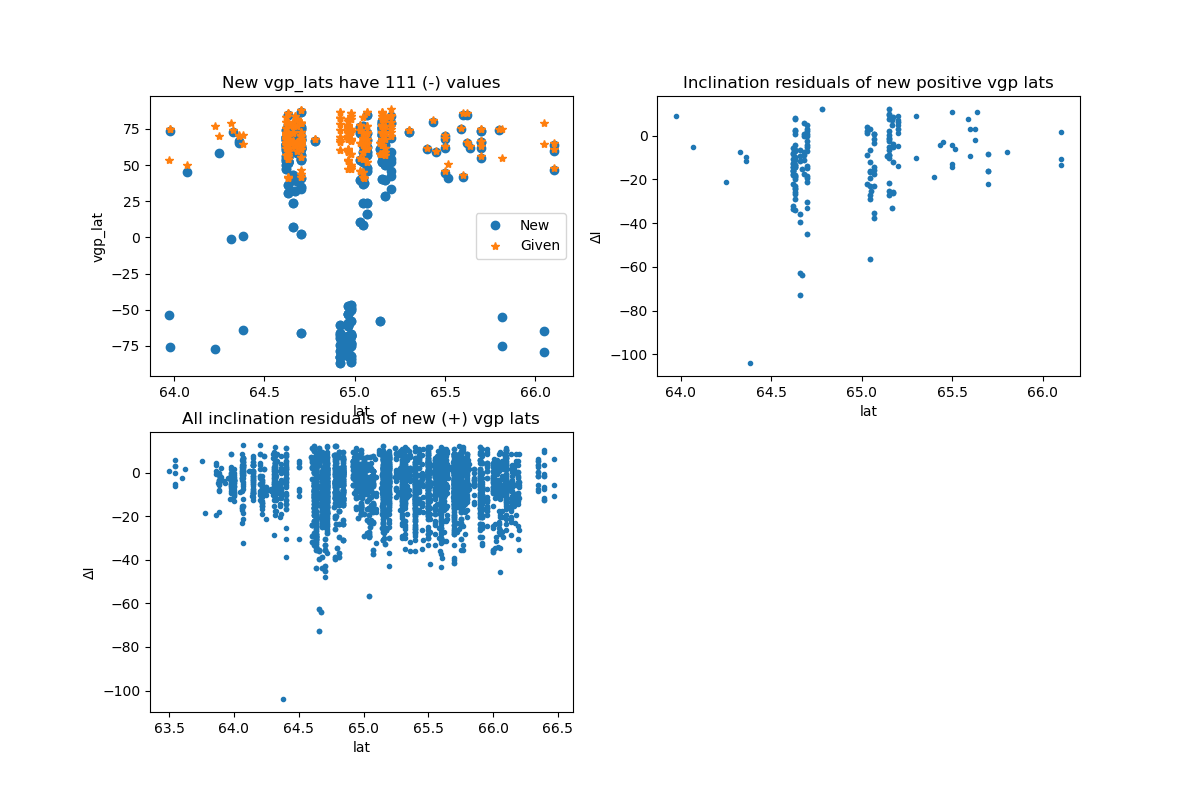

In [50]:
%matplotlib widget

# creating a new df based on the difference in vgp lats being greater than a few decimal points
ice_diff_vgps = df.loc[df['lat_vgp_diff0'] > 1]  
print('# of records that differ from given and new vgps:', len(ice_diff_vgps))

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(ice_diff_vgps['lat'], ice_diff_vgps['LAT_VGP0'],'o', label='New')
plt.plot(ice_diff_vgps['lat'], ice_diff_vgps['lat_vgp'],'*', label='Given')
plt.xlabel('lat')
plt.ylabel('vgp_lat')
plt.legend()
plt.title('New vgp_lats have 111 (-) values');
print('# of negative vgp latitudes:' ,len(ice_diff_vgps.loc[ice_diff_vgps['LAT_VGP0']<0]))

plt.subplot(222)
# new df of only positive LAT_VGP0 values
ice_diff_vgpsN = ice_diff_vgps.loc[ice_diff_vgps['LAT_VGP0'] > 0]

plt.plot(ice_diff_vgpsN.lat, ice_diff_vgpsN.ΔI, '.');
plt.xlabel('lat')
plt.ylabel('ΔI');
plt.title('Inclination residuals of new positive vgp lats')
print('# of positive vgp latitudes found:', len(ice_diff_vgpsN))

# sorting all "normal" data by new VGP_LAT0 > 0
dfN = df.loc[df['LAT_VGP0'] > 0]
plt.subplot(223)
plt.plot(dfN.lat, dfN.ΔI, '.');
plt.xlabel('lat')
plt.ylabel('ΔI')
plt.title('All inclination residuals of new (+) vgp lats');

Of the given vgp latitudes, 111 records were found to actually be negative after recalculating them. There are 111 records that were missing a negative sign and therefore were still marked as Normal in the "dir_polarity" column of this dataset. 

The inclination residuals produced still show more variation from 0 than we would like, but this can be further investigated. 